In [3]:
using CSV, DataFrames
using Pkg
using Distributions, KernelDensity
using StatsPlots, Plots

In [4]:
using StatsBase

# Preprocessing dataset


In [6]:
# read csv files 
df = CSV.read("/home/felipe/Documents/USP/8semestre/Projeto_microbiota/RAW/abundance_stoolsubset.csv", DataFrame)

# view 10 rowns of all columns
df[1:10, :]

10×1990 DataFrame
 Row │ dataset_name           Candela_Africa  Candela_Africa_1  Candela_Africa ⋯
     │ String                 String15        String15          String15       ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ sampleID               H10             H11               H12            ⋯
   2 │ subjectID              h10             h11               h12
   3 │ bodysite               stool           stool             stool
   4 │ disease                n               n                 n
   5 │ age                    40              29                8              ⋯
   6 │ gender                 female          female            female
   7 │ country                tanzania        tanzania          tanzania
   8 │ sequencing_technology  Illumina        Illumina          Illumina
   9 │ pubmedid               25981789        25981789          25981789       ⋯
  10 │ camp                   dedauko         dedauko           dedauko
                                                            1987 columns omitted

In [7]:
# transpose dataframe

# get colnames
colnames = names(df)
# create new columns
df[!, :id] = 1:size(df, 1)

df1 = stack(df, colnames)
df = unstack(df1, :variable, :id, :value)

df[1:10, :]

10×2339 DataFrame
 Row │ variable          1         2          3         4        5        6    ⋯
     │ String            String?   String?    String?   String?  String?  Stri ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ dataset_name      sampleID  subjectID  bodysite  disease  age      gend ⋯
   2 │ Candela_Africa    H10       h10        stool     n        40       fema
   3 │ Candela_Africa_1  H11       h11        stool     n        29       fema
   4 │ Candela_Africa_2  H12       h12        stool     n        8        fema
   5 │ Candela_Africa_3  H13       h13        stool     n        34       male ⋯
   6 │ Candela_Africa_4  H14       h14        stool     n        30       male
   7 │ Candela_Africa_5  H15       h15        stool     n        16       male
   8 │ Candela_Africa_6  H16       h16        stool     n        21       male
   9 │ Candela_Africa_7  H17       h17        stool     n        23       male ⋯
  10 │ Candela_Africa_8  H18       h18        stool     n        17       male
                                                            2333 columns omitted

In [8]:
# rename columns names
rename!(df, Symbol.(Vector(df[1,:])))[2:end,:]

1989×2339 DataFrame
  Row │ dataset_name                       sampleID             subjectID  bod ⋯
      │ String                             String?              String?    Str ⋯
──────┼─────────────────────────────────────────────────────────────────────────
    1 │ Candela_Africa                     H10                  h10        sto ⋯
    2 │ Candela_Africa_1                   H11                  h11        sto
    3 │ Candela_Africa_2                   H12                  h12        sto
    4 │ Candela_Africa_3                   H13                  h13        sto
    5 │ Candela_Africa_4                   H14                  h14        sto ⋯
    6 │ Candela_Africa_5                   H15                  h15        sto
    7 │ Candela_Africa_6                   H16                  h16        sto
    8 │ Candela_Africa_7                   H17                  h17        sto
    9 │ Candela_Africa_8                   H18                  h18        sto ⋯
   10 │ Candela_Africa_9                   H19                  h19        sto
   11 │ Candela_Africa_10                  H1                   h1         sto
  ⋮   │                 ⋮                           ⋮               ⋮          ⋱
 1980 │ Zeller_fecal_colorectal_cancer_1…  CCIS91228662ST-4-0   fr-275     sto
 1981 │ Zeller_fecal_colorectal_cancer_1…  CCIS93040568ST-20-0  fr-682     sto ⋯
 1982 │ Zeller_fecal_colorectal_cancer_1…  CCIS94417875ST-3-0   fr-110     sto
 1983 │ Zeller_fecal_colorectal_cancer_1…  CCIS94496512ST-4-0   fr-229     sto
 1984 │ Zeller_fecal_colorectal_cancer_1…  CCIS95097901ST-4-0   fr-696     sto
 1985 │ Zeller_fecal_colorectal_cancer_1…  CCIS95409808ST-4-0   fr-152     sto ⋯
 1986 │ Zeller_fecal_colorectal_cancer_1…  CCIS96387239ST-4-0   fr-626     sto
 1987 │ Zeller_fecal_colorectal_cancer_1…  CCIS98482370ST-3-0   fr-052     sto
 1988 │ Zeller_fecal_colorectal_cancer_1…  CCIS98512455ST-4-0   fr-459     sto
 1989 │ Zeller_fecal_colorectal_cancer_1…  CCIS98832363ST-4-0   fr-552     sto ⋯
                                              2336 columns and 1968 rows omitted

In [9]:
df[1:10, :]

10×2339 DataFrame
 Row │ dataset_name      sampleID  subjectID  bodysite  disease  age      gend ⋯
     │ String            String?   String?    String?   String?  String?  Stri ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ dataset_name      sampleID  subjectID  bodysite  disease  age      gend ⋯
   2 │ Candela_Africa    H10       h10        stool     n        40       fema
   3 │ Candela_Africa_1  H11       h11        stool     n        29       fema
   4 │ Candela_Africa_2  H12       h12        stool     n        8        fema
   5 │ Candela_Africa_3  H13       h13        stool     n        34       male ⋯
   6 │ Candela_Africa_4  H14       h14        stool     n        30       male
   7 │ Candela_Africa_5  H15       h15        stool     n        16       male
   8 │ Candela_Africa_6  H16       h16        stool     n        21       male
   9 │ Candela_Africa_7  H17       h17        stool     n        23       male ⋯
  10 │ Candela_Africa_8  H18       h18        stool     n        17       male
                                                            2333 columns omitted

In [10]:
# delete row by index
delete!(df, [1])

1989×2339 DataFrame
  Row │ dataset_name                       sampleID             subjectID  bod ⋯
      │ String                             String?              String?    Str ⋯
──────┼─────────────────────────────────────────────────────────────────────────
    1 │ Candela_Africa                     H10                  h10        sto ⋯
    2 │ Candela_Africa_1                   H11                  h11        sto
    3 │ Candela_Africa_2                   H12                  h12        sto
    4 │ Candela_Africa_3                   H13                  h13        sto
    5 │ Candela_Africa_4                   H14                  h14        sto ⋯
    6 │ Candela_Africa_5                   H15                  h15        sto
    7 │ Candela_Africa_6                   H16                  h16        sto
    8 │ Candela_Africa_7                   H17                  h17        sto
    9 │ Candela_Africa_8                   H18                  h18        sto ⋯
   10 │ Candela_Africa_9                   H19                  h19        sto
   11 │ Candela_Africa_10                  H1                   h1         sto
  ⋮   │                 ⋮                           ⋮               ⋮          ⋱
 1980 │ Zeller_fecal_colorectal_cancer_1…  CCIS91228662ST-4-0   fr-275     sto
 1981 │ Zeller_fecal_colorectal_cancer_1…  CCIS93040568ST-20-0  fr-682     sto ⋯
 1982 │ Zeller_fecal_colorectal_cancer_1…  CCIS94417875ST-3-0   fr-110     sto
 1983 │ Zeller_fecal_colorectal_cancer_1…  CCIS94496512ST-4-0   fr-229     sto
 1984 │ Zeller_fecal_colorectal_cancer_1…  CCIS95097901ST-4-0   fr-696     sto
 1985 │ Zeller_fecal_colorectal_cancer_1…  CCIS95409808ST-4-0   fr-152     sto ⋯
 1986 │ Zeller_fecal_colorectal_cancer_1…  CCIS96387239ST-4-0   fr-626     sto
 1987 │ Zeller_fecal_colorectal_cancer_1…  CCIS98482370ST-3-0   fr-052     sto
 1988 │ Zeller_fecal_colorectal_cancer_1…  CCIS98512455ST-4-0   fr-459     sto
 1989 │ Zeller_fecal_colorectal_cancer_1…  CCIS98832363ST-4-0   fr-552     sto ⋯
                                              2336 columns and 1968 rows omitted

In [11]:
unique(df.gender)

6-element Vector{Union{Missing, String}}:
 "female"
 "male"
 "-"
 "nd"
 "na"
 " -"

In [12]:
# remove missing values
df = df[(df.gender .!= "-") .& (df.gender .!= " -") .& (df.gender .!= "na") .& (df.gender .!= "nd"), :]
df[1:10, :]

10×2339 DataFrame
 Row │ dataset_name      sampleID  subjectID  bodysite  disease  age      gend ⋯
     │ String            String?   String?    String?   String?  String?  Stri ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ Candela_Africa    H10       h10        stool     n        40       fema ⋯
   2 │ Candela_Africa_1  H11       h11        stool     n        29       fema
   3 │ Candela_Africa_2  H12       h12        stool     n        8        fema
   4 │ Candela_Africa_3  H13       h13        stool     n        34       male
   5 │ Candela_Africa_4  H14       h14        stool     n        30       male ⋯
   6 │ Candela_Africa_5  H15       h15        stool     n        16       male
   7 │ Candela_Africa_6  H16       h16        stool     n        21       male
   8 │ Candela_Africa_7  H17       h17        stool     n        23       male
   9 │ Candela_Africa_8  H18       h18        stool     n        17       male ⋯
  10 │ Candela_Africa_9  H19       h19        stool     n        15       male
                                                            2333 columns omitted

In [13]:
unique(df.disease)

13-element Vector{Union{Missing, String}}:
 "n"
 "ibd_ulcerative_colitis"
 "ibd_crohn_disease"
 "n_relative"
 "cirrhosis"
 "obese"
 "overweight"
 "-"
 "underweight"
 "t2d"
 "cancer"
 "small_adenoma"
 "large_adenoma"

In [14]:
df = df[(df.disease .!= "-"),:]

1486×2339 DataFrame
  Row │ dataset_name                       sampleID             subjectID  bod ⋯
      │ String                             String?              String?    Str ⋯
──────┼─────────────────────────────────────────────────────────────────────────
    1 │ Candela_Africa                     H10                  h10        sto ⋯
    2 │ Candela_Africa_1                   H11                  h11        sto
    3 │ Candela_Africa_2                   H12                  h12        sto
    4 │ Candela_Africa_3                   H13                  h13        sto
    5 │ Candela_Africa_4                   H14                  h14        sto ⋯
    6 │ Candela_Africa_5                   H15                  h15        sto
    7 │ Candela_Africa_6                   H16                  h16        sto
    8 │ Candela_Africa_7                   H17                  h17        sto
    9 │ Candela_Africa_8                   H18                  h18        sto ⋯
   10 │ Candela_Africa_9                   H19                  h19        sto
   11 │ Candela_Africa_10                  H1                   h1         sto
  ⋮   │                 ⋮                           ⋮               ⋮          ⋱
 1477 │ Zeller_fecal_colorectal_cancer_1…  CCIS91228662ST-4-0   fr-275     sto
 1478 │ Zeller_fecal_colorectal_cancer_1…  CCIS93040568ST-20-0  fr-682     sto ⋯
 1479 │ Zeller_fecal_colorectal_cancer_1…  CCIS94417875ST-3-0   fr-110     sto
 1480 │ Zeller_fecal_colorectal_cancer_1…  CCIS94496512ST-4-0   fr-229     sto
 1481 │ Zeller_fecal_colorectal_cancer_1…  CCIS95097901ST-4-0   fr-696     sto
 1482 │ Zeller_fecal_colorectal_cancer_1…  CCIS95409808ST-4-0   fr-152     sto ⋯
 1483 │ Zeller_fecal_colorectal_cancer_1…  CCIS96387239ST-4-0   fr-626     sto
 1484 │ Zeller_fecal_colorectal_cancer_1…  CCIS98482370ST-3-0   fr-052     sto
 1485 │ Zeller_fecal_colorectal_cancer_1…  CCIS98512455ST-4-0   fr-459     sto
 1486 │ Zeller_fecal_colorectal_cancer_1…  CCIS98832363ST-4-0   fr-552     sto ⋯
                                              2336 columns and 1465 rows omitted

In [15]:
df[1:10,:]

10×2339 DataFrame
 Row │ dataset_name      sampleID  subjectID  bodysite  disease  age      gend ⋯
     │ String            String?   String?    String?   String?  String?  Stri ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ Candela_Africa    H10       h10        stool     n        40       fema ⋯
   2 │ Candela_Africa_1  H11       h11        stool     n        29       fema
   3 │ Candela_Africa_2  H12       h12        stool     n        8        fema
   4 │ Candela_Africa_3  H13       h13        stool     n        34       male
   5 │ Candela_Africa_4  H14       h14        stool     n        30       male ⋯
   6 │ Candela_Africa_5  H15       h15        stool     n        16       male
   7 │ Candela_Africa_6  H16       h16        stool     n        21       male
   8 │ Candela_Africa_7  H17       h17        stool     n        23       male
   9 │ Candela_Africa_8  H18       h18        stool     n        17       male ⋯
  10 │ Candela_Africa_9  H19       h19        stool     n        15       male
                                                            2333 columns omitted

In [16]:
# count values by condition
length(findall(df.disease .== "n"))

875

In [17]:
# select rows by condition
df = df[(df.age .!= "-") .& (df.age .!= " -") .& (df.age .!= "na") .& (df.age .!= "nd"), :]

1288×2339 DataFrame
  Row │ dataset_name                       sampleID             subjectID  bod ⋯
      │ String                             String?              String?    Str ⋯
──────┼─────────────────────────────────────────────────────────────────────────
    1 │ Candela_Africa                     H10                  h10        sto ⋯
    2 │ Candela_Africa_1                   H11                  h11        sto
    3 │ Candela_Africa_2                   H12                  h12        sto
    4 │ Candela_Africa_3                   H13                  h13        sto
    5 │ Candela_Africa_4                   H14                  h14        sto ⋯
    6 │ Candela_Africa_5                   H15                  h15        sto
    7 │ Candela_Africa_6                   H16                  h16        sto
    8 │ Candela_Africa_7                   H17                  h17        sto
    9 │ Candela_Africa_8                   H18                  h18        sto ⋯
   10 │ Candela_Africa_9                   H19                  h19        sto
   11 │ Candela_Africa_10                  H1                   h1         sto
  ⋮   │                 ⋮                           ⋮               ⋮          ⋱
 1279 │ Zeller_fecal_colorectal_cancer_1…  CCIS91228662ST-4-0   fr-275     sto
 1280 │ Zeller_fecal_colorectal_cancer_1…  CCIS93040568ST-20-0  fr-682     sto ⋯
 1281 │ Zeller_fecal_colorectal_cancer_1…  CCIS94417875ST-3-0   fr-110     sto
 1282 │ Zeller_fecal_colorectal_cancer_1…  CCIS94496512ST-4-0   fr-229     sto
 1283 │ Zeller_fecal_colorectal_cancer_1…  CCIS95097901ST-4-0   fr-696     sto
 1284 │ Zeller_fecal_colorectal_cancer_1…  CCIS95409808ST-4-0   fr-152     sto ⋯
 1285 │ Zeller_fecal_colorectal_cancer_1…  CCIS96387239ST-4-0   fr-626     sto
 1286 │ Zeller_fecal_colorectal_cancer_1…  CCIS98482370ST-3-0   fr-052     sto
 1287 │ Zeller_fecal_colorectal_cancer_1…  CCIS98512455ST-4-0   fr-459     sto
 1288 │ Zeller_fecal_colorectal_cancer_1…  CCIS98832363ST-4-0   fr-552     sto ⋯
                                              2336 columns and 1267 rows omitted

In [18]:
# change data type with missing values 
df.age = passmissing(parse).(Float64, df.age)

1288-element Vector{Float64}:
 40.0
 29.0
  8.0
 34.0
 30.0
 16.0
 21.0
 23.0
 17.0
 15.0
 43.0
 13.0
 43.0
  ⋮
 78.0
 63.0
 63.0
 65.0
 59.0
 64.0
 52.0
 63.0
 66.0
 53.0
 63.0
 55.0

# Exploratory analysis

In [19]:
hist = Plots.Plot[]
for disease in unique(df.disease)
    push!(hist, histogram(df.age[df.disease .== disease], label = false, title = "Age distribution of "*disease,
            titlefontsize = 6, xtickfontsize = 6, ytickfontsize = 6, ylabelfontsize = 6, xlabelfontsize = 6))
    xlabel!("age")
    ylabel!("count")
    
end

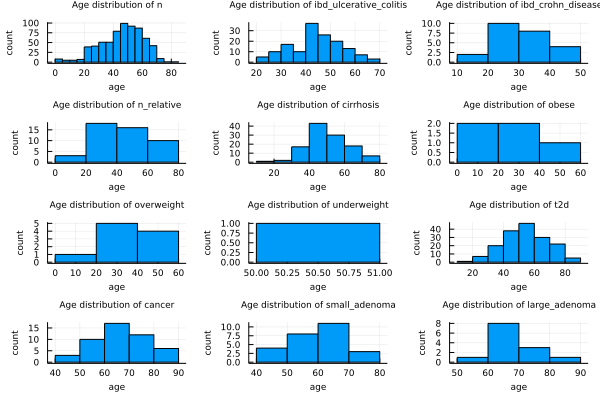

In [20]:
plot(hist[1], hist[2], hist[3], hist[4], hist[5], hist[6], hist[7], hist[8], hist[9], hist[10], hist[11],hist[12], layout = (4, 3))

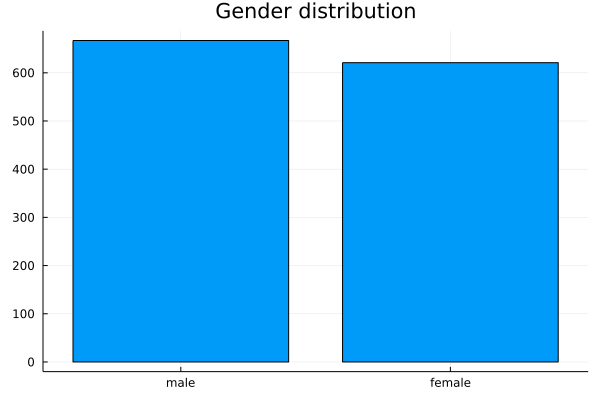

In [21]:
plot(countmap(df.gender), seriestype = :bar, label = false, title = "Gender distribution")

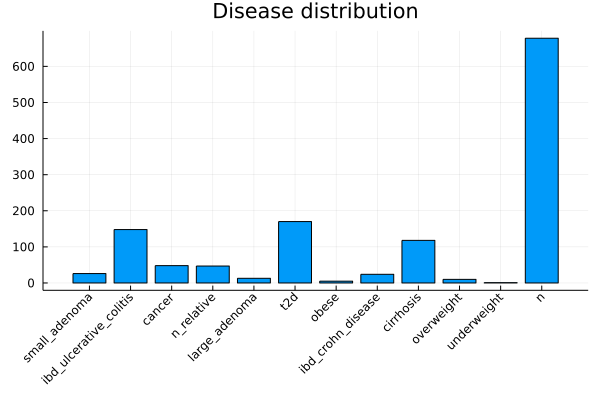

In [22]:
plot(countmap(df.disease), seriestype = :bar, label = false, title = "Disease distribution", xrotation = 45)

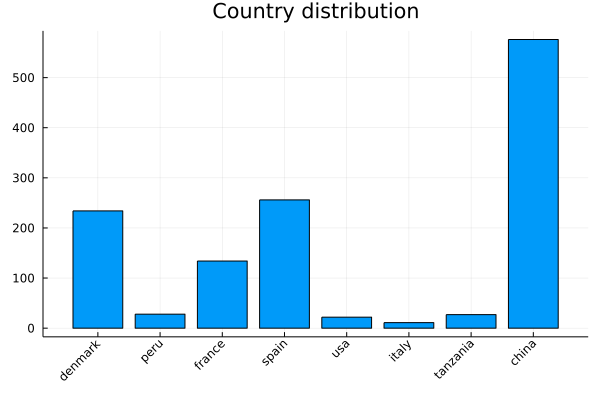

In [23]:
plot(countmap(df.country), seriestype = :bar, label = false, title = "Country distribution", xrotation = 45)

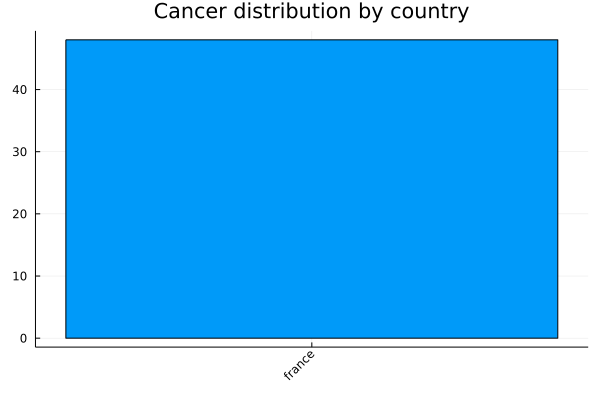

In [24]:
plot(countmap(df.country[df.disease .== "cancer"]), seriestype = :bar, label = false, title = "Cancer distribution by country", xrotation = 45)

In [25]:
a = plot(countmap(df.country[df.disease .== "ibd_ulcerative_colitis"]), seriestype = :bar, label = false, title = "IBD distribution by country", xrotation = 45)
typeof(a)

Plots.Plot{Plots.GRBackend}

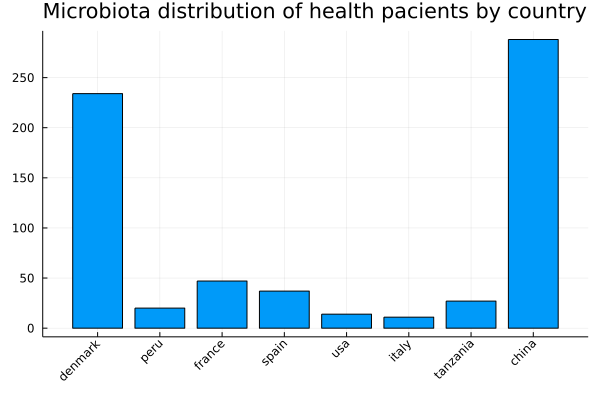

In [26]:
plot(countmap(df.country[df.disease .== "n"]), seriestype = :bar, label = false, title = "Microbiota distribution of health pacients by country", xrotation = 45)